# O2LY 데이터 시각화 코드

## 0. 패키지 설치 구문 

In [1]:
install.packages("plotrix")
install.packages("fmsb")


  There is a binary version available but the source version is later:
        binary source needs_compilation
plotrix  3.8-1  3.8-2             FALSE



installing the source package 'plotrix'




  There is a binary version available but the source version is later:
     binary source needs_compilation
fmsb  0.7.1  0.7.2             FALSE



installing the source package 'fmsb'



In [2]:
library(ggplot2)
library(reshape2)
library(readxl)
library(plyr)
library(plotrix)
library(fmsb)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## 0-1. 데이터 불러오기

In [14]:
setwd("C:/Users/santa/OneDrive/바탕 화면/for_Jupyter_ver2/for_Jupyter")
library(readxl)
(name_sheets <- excel_sheets("구직자를위한시각화.xlsx"))
for (i in 1:length(name_sheets))
    assign(name_sheets [i], read_excel("구직자를위한시각화.xlsx",sheet=name_sheets[i]))

[1] "Q1"     "Q1.1"   "Q2.1"   "Q2.2"   "Q3"     "Q4"     "Q5.1"   "Q5.2"  
 [9] "Q5.3"   "Q5.4"   "Q7.1"   "Q7.2"   "Q7.3"   "Q7.4.1" "Q7.4.2"

## 1. 현재 구직 부분은 어느 세대들이 차지하는가(Q1)

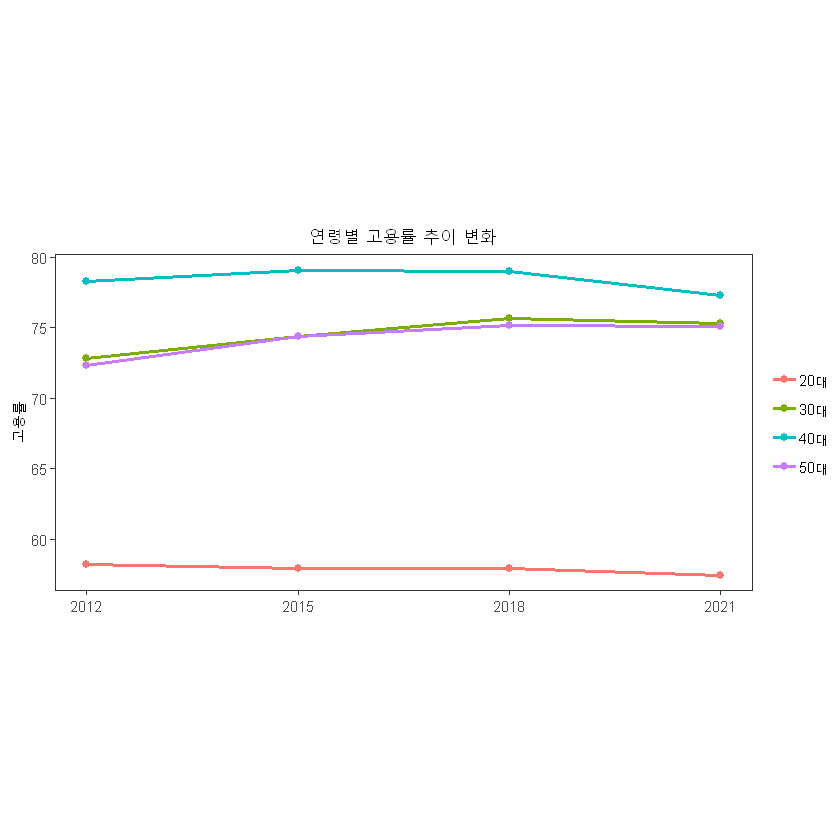

In [18]:
ERDF<-ddply(Q1,c("generation","year","accessionrate"))
l<-ggplot(ERDF, aes(x=year, y=accessionrate, group=generation, color=generation))+geom_line(size=1)+geom_point(size=2)+ggtitle('연령별 고용률 추이 변화')
l +theme_test()+theme(plot.title=element_text(hjust=0.5),axis.title.x=element_blank(),legend.title=element_blank())+ylab("고용률")+coord_fixed(ratio=0.2)+scale_x_continuous(breaks=c(2012,2015,2018,2021))

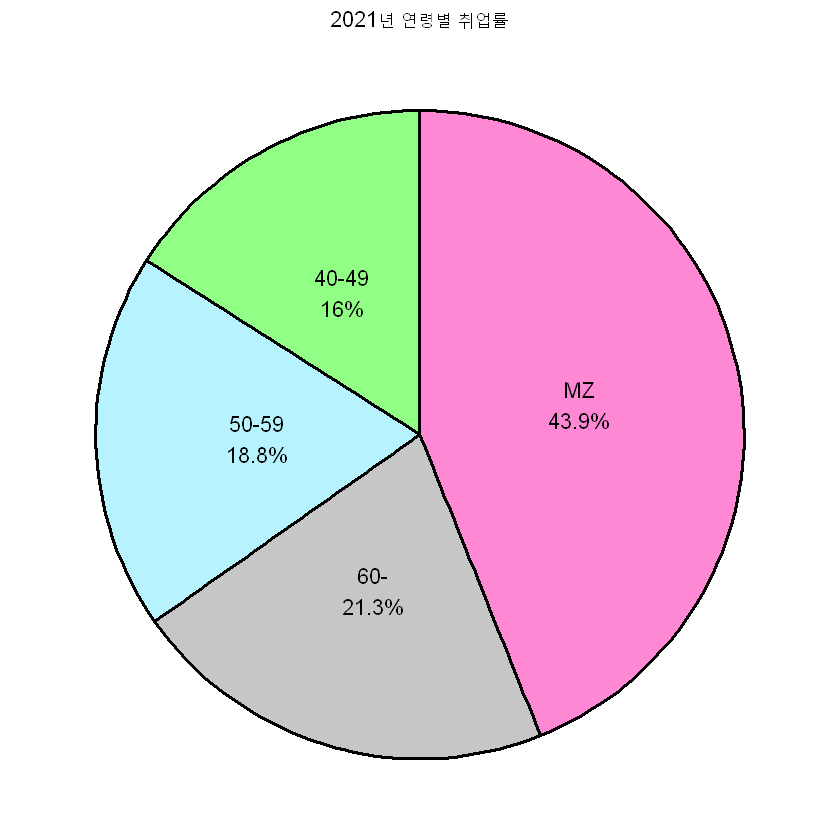

In [19]:
worker.data<-c((818+4105+2454)/16790*100,2681/16790*100,3156/16790*100,3576/16790*100)
generation<-c("MZ","40-49","50-59","60-")
WF<-data.frame(generation,worker.data)
ggplot(WF,aes(x="",y=worker.data,fill=generation))+geom_bar(stat="identity",color="black",size=1)+theme_void()+coord_polar("y",start=0)+geom_text(aes(label=paste0(generation,"\n",round(worker.data,1),"%"), size=15),position=position_stack(vjust=0.5))+labs(title="2021년 연령별 취업률")+theme(plot.title=element_text(hjust=0.5),legend.title=element_blank(),legend.position="none")+scale_fill_manual(values=c("#91FF85","#B7F2FF","#C6C6C6","#FF88D5"))

## 2. MZ 세대가 지원 기업을 정할 때 활용하는 정보(Q5)

#### (Q5-1). 자사 타사 기업의 이미지 형성 계기

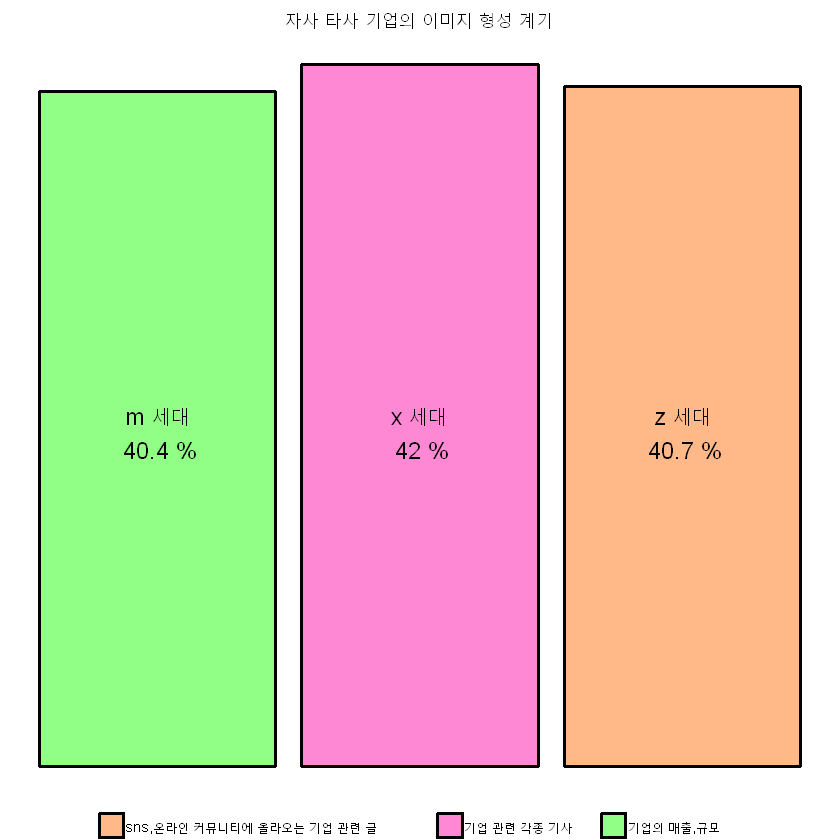

In [20]:
MCDF<-ddply(Q5.1,c("generation","making",'data'))
ggplot(MCDF)+geom_bar(stat="identity",aes(x=generation, y=data, fill=making),position="dodge", color="black", size=1)+geom_text(aes(x=generation,y=20,label=paste(generation,"세대\n",data,"%")),position = position_dodge(width=1),size=5)+ggtitle("자사 타사 기업의 이미지 형성 계기")+theme_void()+theme(plot.title=element_text(hjust=0.5),axis.title=element_blank(),axis.text=element_blank(),axis.ticks=element_blank(),legend.title=element_blank(),legend.position="bottom")+scale_fill_manual(values=c("#FFB887","#FF88D5","#91FF85"))

#### (Q5-2). 기업 정보(근무환경, 분위기 등) 확인 시 유용한 채널

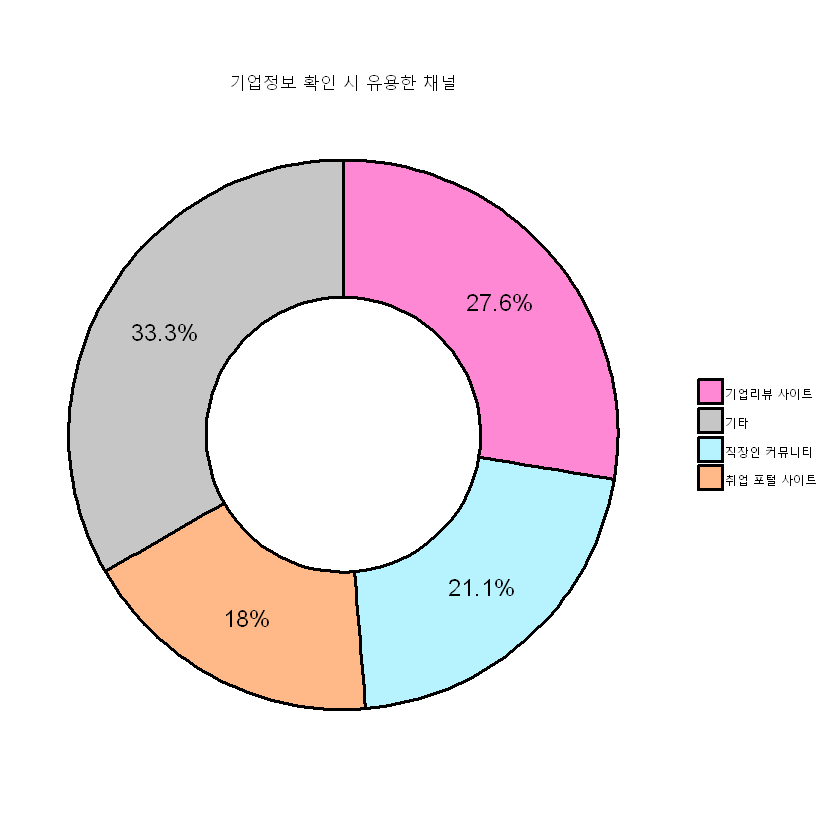

In [21]:
SP<-ddply(Q5.2,c("site",'percent'))
Q5.2$ymax3<-cumsum(Q5.2$percent)
ymin3<-c(0,head(Q5.2$ymax3,n=-1))
labelposition3<-(Q5.2$ymax3+ymin3)/2
label3<-paste0(Q5.2$percent,"%")
ggplot(SP,aes(xmin=3,xmax=4,ymin=ymin3,ymax=Q5.2$ymax3,fill=Q5.2$site))+geom_rect(color="black",size=1)+geom_text(aes(3.5,y=labelposition3,label=label3),size=5)+coord_polar(theta="y")+xlim(c(2,4))+theme_void()+ggtitle("기업정보 확인 시 유용한 채널")+theme(plot.title=element_text(hjust=0.5),legend.title=element_blank())+scale_fill_manual(values=c("#FF88D5","#C6C6C6","#B7F2FF","#FFB887"))+scale_color_discrete(breaks=c("기업리뷰 사이트","직장인 커뮤니티","취업 포털 사이트","기타"))

#### (Q5-3). 취업, 채용 정보를 얻기 위해 영상 콘텐츠를 이용한 적이 있다

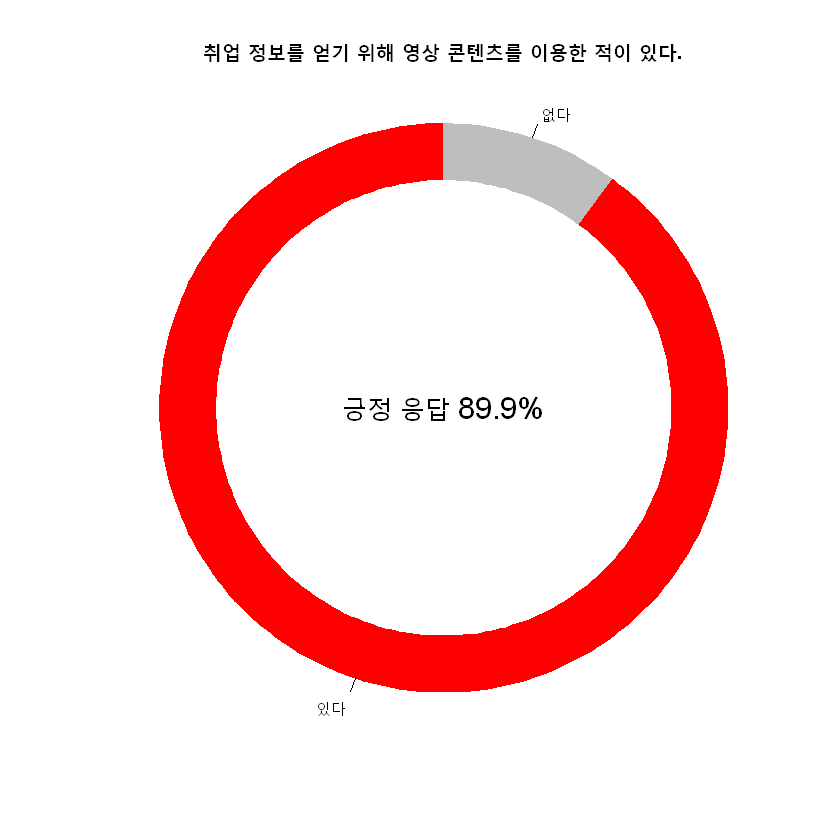

In [22]:
contents <- ddply(Q5.3,c("pcontents",'ncontents'))
colors<-c("gray","red")
pie(contents$pcontents, col=colors, border = NA, labels=contents$ncontents, radius=1, main="취업 정보를 얻기 위해 영상 콘텐츠를 이용한 적이 있다.",clockwise=T)
par(new=T)
pie(1,labels="",radius=0.8, col="white", border=NA)
text(0,0,"긍정 응답 89.9%",cex=1.5)

#### (Q5-4). 영상 콘텐츠 유형별 취업 준비 도움 정도

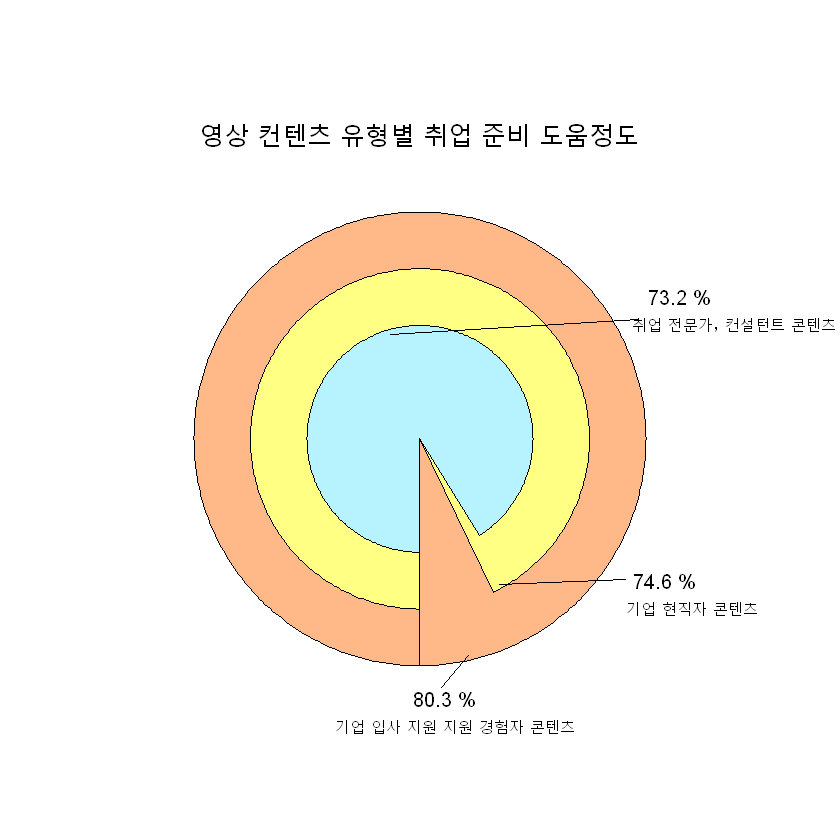

In [23]:
DP<-ddply(Q5.4,c("doum",'per'))
fan.plot(Q5.4$per, main="영상 컨텐츠 유형별 취업 준비 도움정도",labels=paste(Q5.4$per,"%\n",Q5.4$doum), col=c("#FFB887","#FFFF83","#B7F2FF"), align="left", max.span=2*pi,shrink=0.25,label.radius=1.2,labelpos=c(4.8,-0.6,0.5))

## 3. 직무만족도(Q6)

## 4. 이직에 대한 인식변화(Q7) 

#### (Q7-1). 직장인 경력/연차별 이직경험률

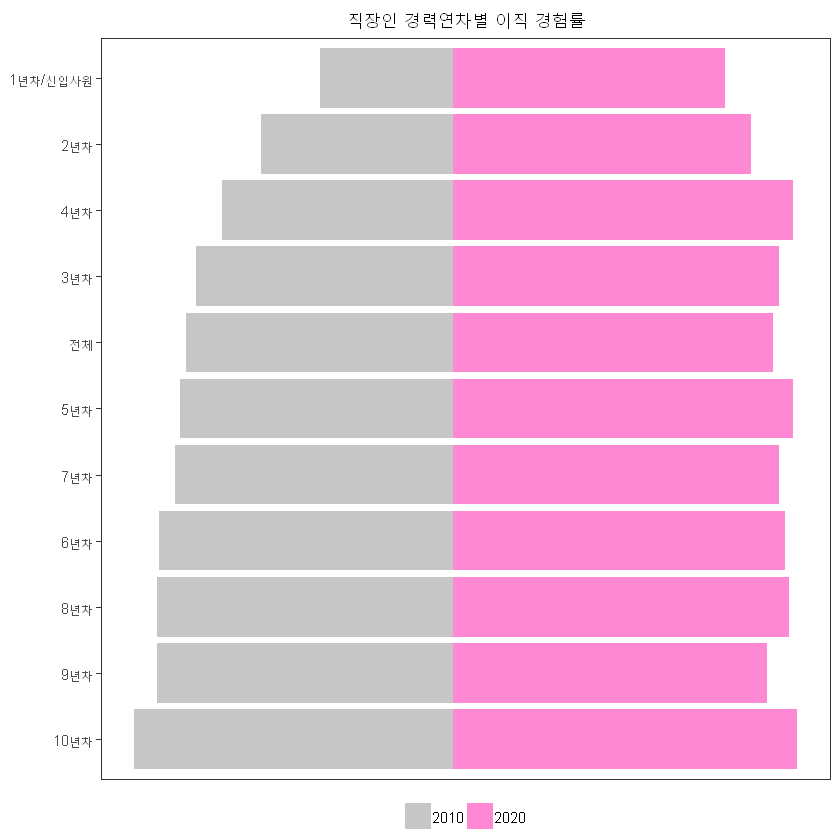

In [24]:
JOB<-ddply(Q7.1,c("years3",'d_2010','d_2020'))
JOB$d_2010 <- -1 * JOB$d_2010
JOB$years3 <- factor(JOB$years3, levels=JOB$years3)
JJOB<-melt(JOB,id.vars="years3",value.name="data",variable.name="year")
s<-ggplot(data=JJOB,aes(x=reorder(years3,data),y=data,fill=year))+geom_bar(data=subset(JJOB,year=="d_2010"),stat="identity")+geom_bar(data=subset(JJOB,year=="d_2020"),stat="identity")+coord_flip()
s+theme_test()+theme(plot.title=element_text(hjust=0.5),axis.title=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank(),legend.title=element_blank(),legend.position="bottom")+scale_fill_manual(values=c("#C6C6C6","#FF88D5"),label=c("2010","2020"))+ggtitle("직장인 경력연차별 이직 경험률")

#### (Q7-2). 평균 이직 횟수

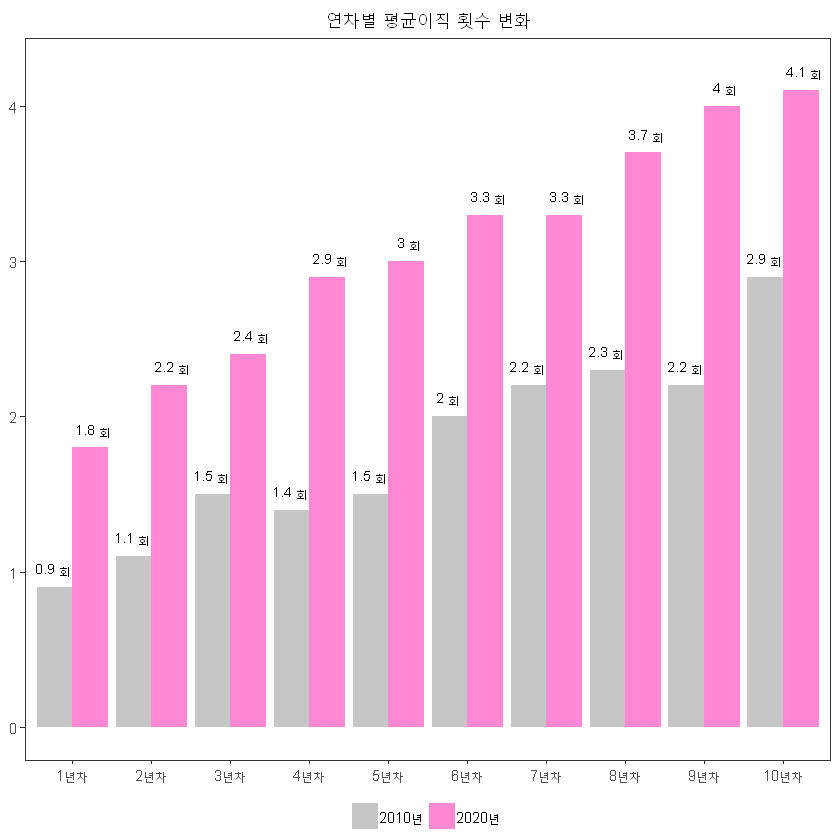

In [25]:
a<-ddply(Q7.2,c("aver_year","year","data"))
ggplot(a,aes(x=reorder(aver_year,data), y=data, fill=year))+geom_bar(stat='identity',position='dodge')+geom_text(aes(y=data+0.125,label=paste(data,"회")),position = position_dodge(width=1),size=3)+ggtitle("연차별 평균이직 횟수 변화")+theme_test()+theme(plot.title=element_text(hjust=0.5),axis.title=element_blank(),legend.title=element_blank(),legend.position="bottom")+scale_fill_manual(values=c("#C6C6C6","#FF88D5"))+xlab(NULL)+ylab(NULL)

#### (Q7-3). 이직결심이유

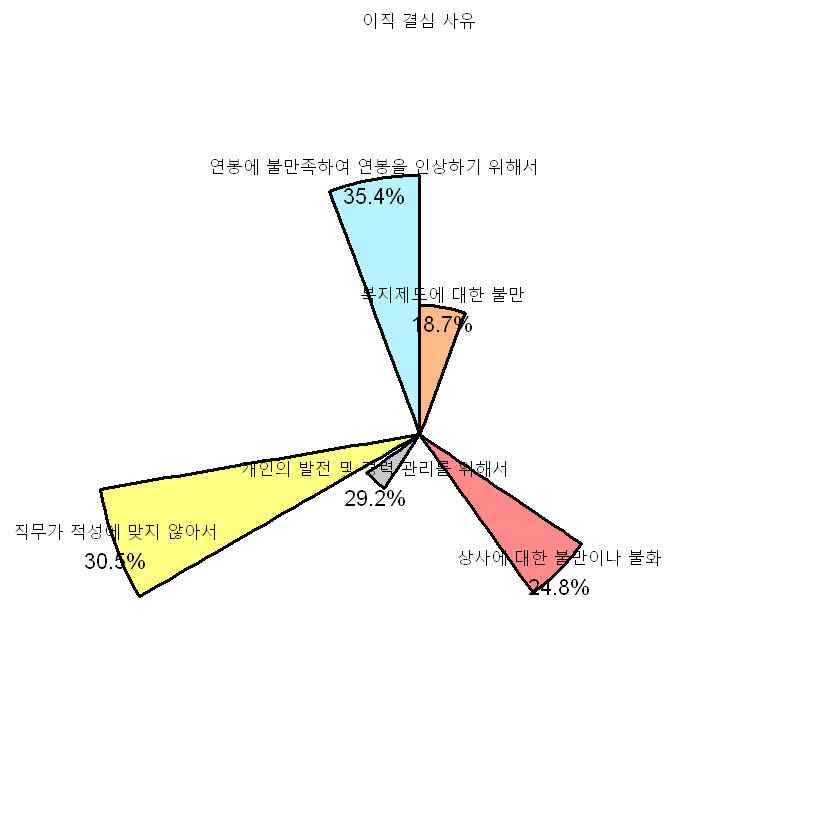

In [26]:
reasona<-ddply(Q7.3,c("reason","reasonsflabel"))
ggplot(reasona, aes(reason, reasonsflabel, fill = factor(reason)))+geom_bar(width = 1, stat = "identity", color = "black",size=1)+geom_text(aes(label=paste0(reasonsflabel,"\n",round(reason,1),"%"), size=10))+theme_void()+ggtitle("이직 결심 사유")+theme(plot.title=element_text(hjust=0.5),legend.position="none")+coord_polar()+scale_fill_manual(values=c("#FFB887","#FF8A89","#C6C6C6","#FFFF83","#B7F2FF"))

#### (Q7-4). 이직에 대하여_20대/40대

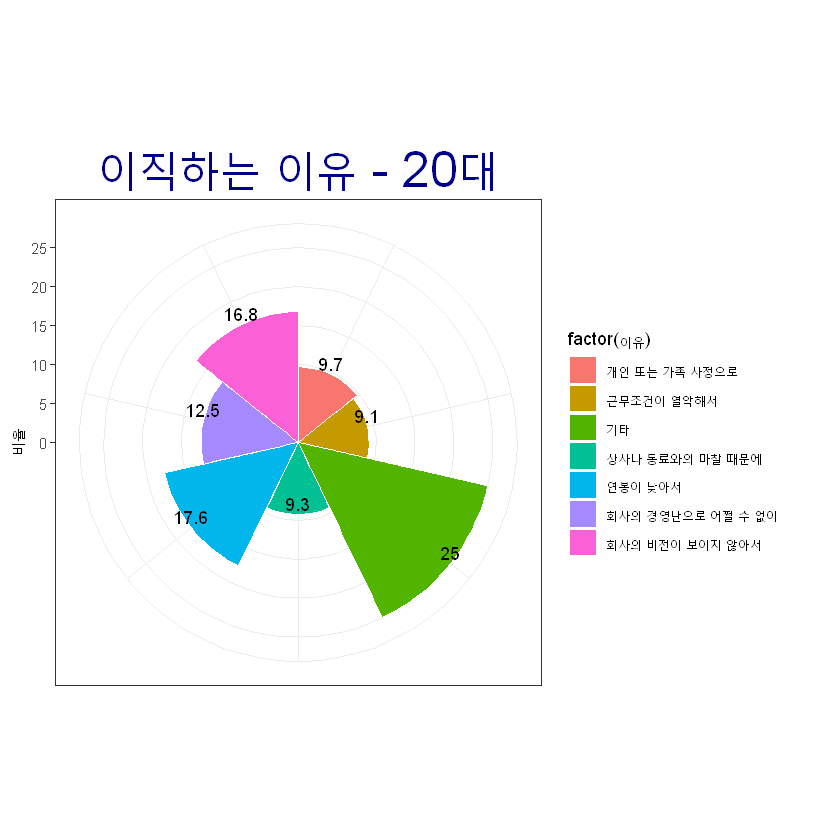

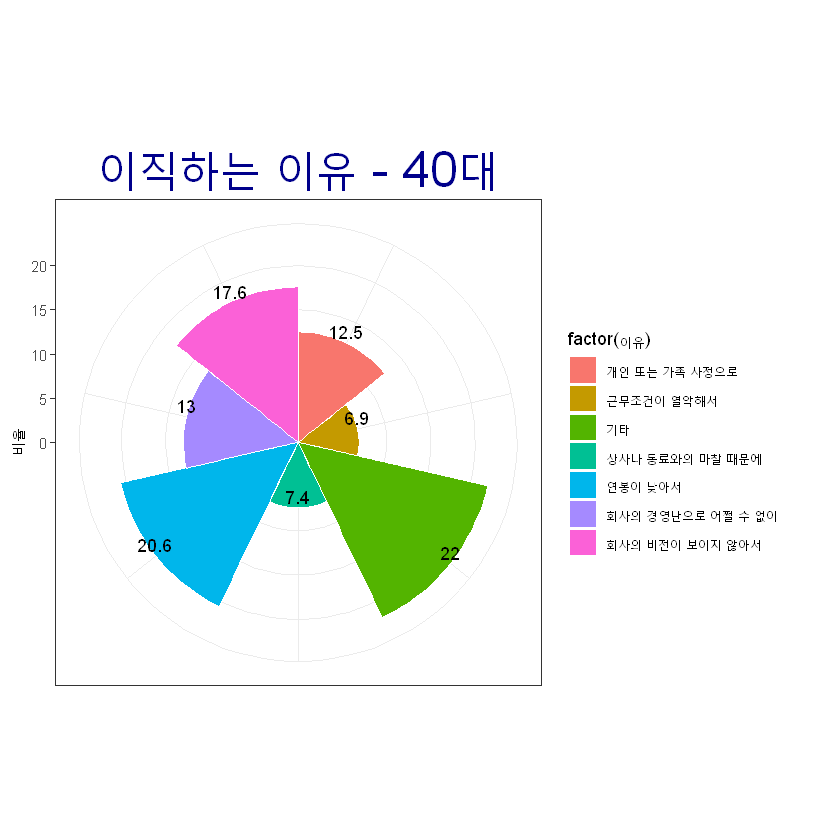

In [32]:
data_20 <-ddply(Q7.4.1,c("이유","비율"))
data_40 <-ddply(Q7.4.2,c("이유","비율"))

turnover_20 <-ggplot(data_20,aes(x=이유,y=비율,fill=factor(이유)))+geom_col(width=1,color="white")+theme_bw()+aes(stringr::str_wrap(이유, 10), 비율)+xlab(NULL)+theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())+coord_polar() +theme_minimal()+theme_bw()+aes(stringr::str_wrap(이유, 10), 비율)+xlab(NULL)+theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())+geom_text(aes(label=비율),vjust=-0.3)+ggtitle("이직하는 이유 - 20대")+theme(plot.title=element_text(hjust=0.5,color="darkblue",size=30))
turnover_40 <-ggplot(data_40,aes(x=이유,y=비율,fill=factor(이유)))+geom_col(width=1,color="white")+theme_bw()+aes(stringr::str_wrap(이유, 10), 비율)+xlab(NULL)+theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())+coord_polar() +theme_minimal()+theme_bw()+aes(stringr::str_wrap(이유, 10), 비율)+xlab(NULL)+theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank())+geom_text(aes(label=비율),vjust=-0.3)+ggtitle("이직하는 이유 - 40대")+theme(plot.title=element_text(hjust=0.5,color="darkblue",size=30))

turnover_20
turnover_40

## 5. MZ 세대들이 원하는 요소(Q4) 

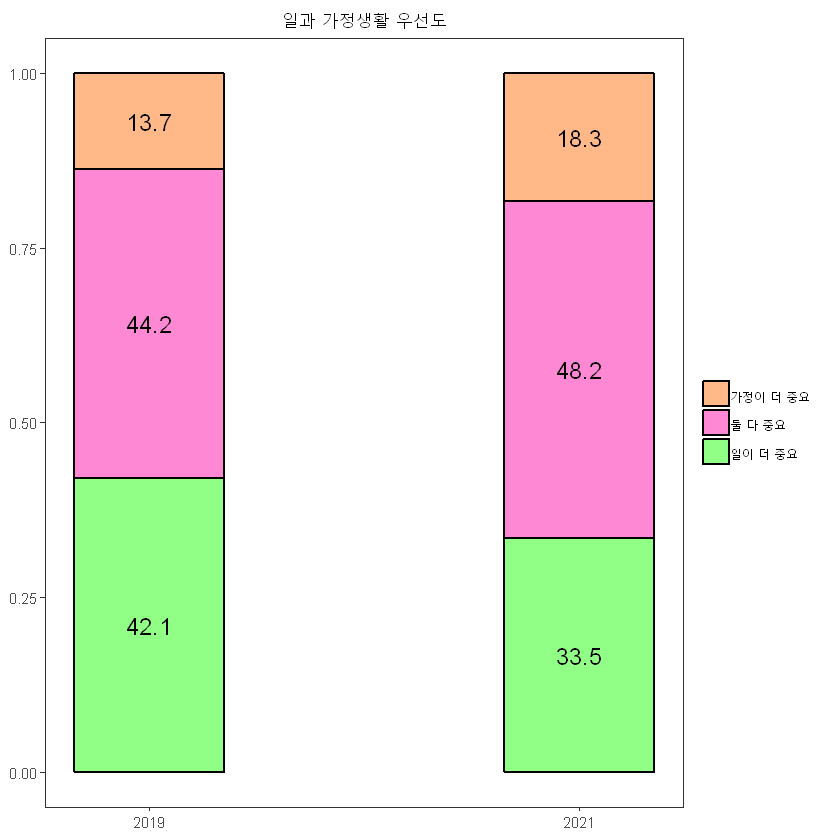

In [28]:
WFD<-ddply(Q4,c("workfamily","years3",'wfdata'))
ggplot(WFD,aes(x=years3,y=wfdata,fill=workfamily))+geom_bar(stat="identity",position="fill",width=0.7,color="black",size=0.7)+geom_text(aes(label=paste(wfdata)),size=5,position=position_fill(.5))+ggtitle("일과 가정생활 우선도")+theme_test()+theme(plot.title=element_text(hjust=0.5),axis.title.x=element_blank(),axis.title.y=element_blank(),legend.title=element_blank())+scale_x_continuous(breaks=c(2019,2021))+scale_fill_manual(values=c("#FFB887","#FF88D5","#91FF85"))

## 6. 앞으로 구직 전망_MZ세대 기준(Q2) 

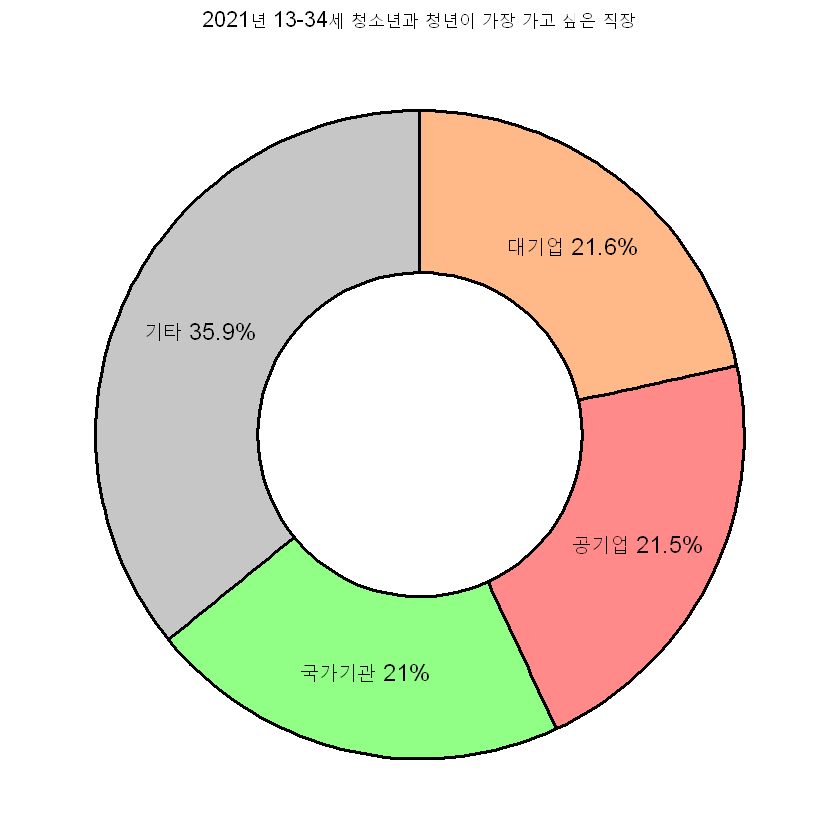

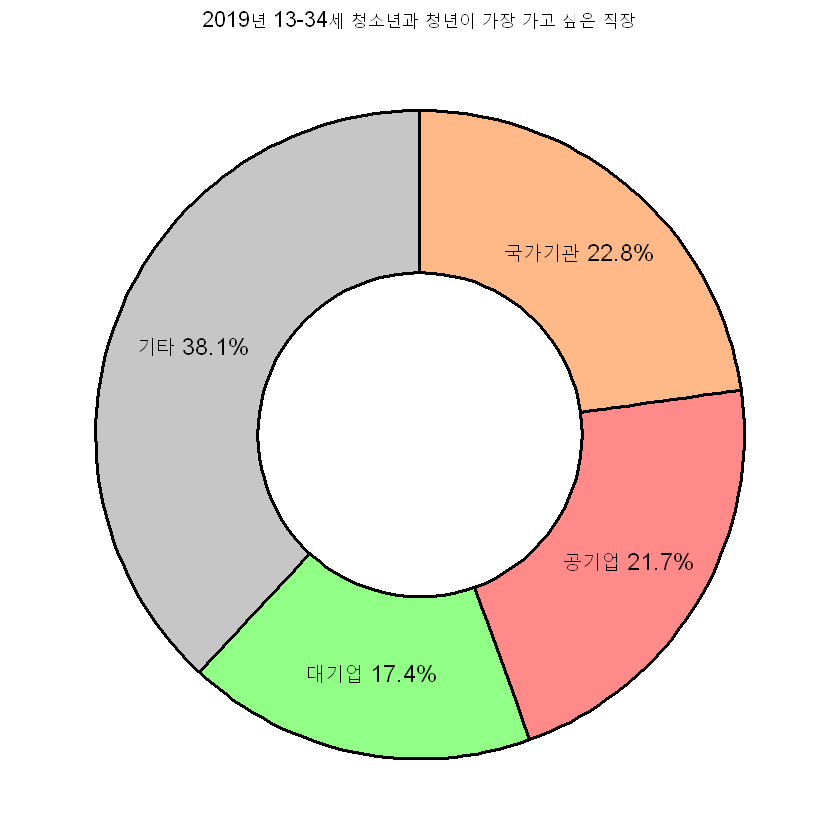

In [29]:
W21DF<-ddply(Q2.1,c("work2021.data","work2021"))
Q2.1$ymax1<-cumsum(Q2.1$work2021.data)
ymin1<-c(0,head(Q2.1$ymax1,n=-1))
labelposition1<-(Q2.1$ymax1+ymin1)/2
label1<-paste0(Q2.1$work2021," ",Q2.1$work2021.data,"%")
ggplot(W21DF,aes(xmin=3,xmax=4,ymin=ymin1,ymax=Q2.1$ymax1,fill=Q2.1$work2021))+geom_rect(color="black",size=1)+geom_text(aes(x=3.5,y=labelposition1,label=label1), size=5)+coord_polar(theta="y")+xlim(c(2,4))+theme_void()+labs(title="2021년 13-34세 청소년과 청년이 가장 가고 싶은 직장")+theme(plot.title=element_text(hjust=0.5),legend.position="none")+scale_fill_manual(values=c("#FF8A89","#91FF85","#C6C6C6","#FFB887"))

W19DF<-ddply(Q2.2,c("work2019.data","work2019"))
Q2.2$ymax2<-cumsum(Q2.2$work2019.data)
ymin2<-c(0,head(Q2.2$ymax2,n=-1))
labelposition2<-(Q2.2$ymax2+ymin2)/2
label2<-paste0(Q2.2$work2019," ",Q2.2$work2019.data,"%")
ggplot(W19DF,aes(xmin=3,xmax=4,ymin=ymin2,ymax=Q2.2$ymax2,fill=Q2.2$work2019))+geom_rect(color="black",size=1)+geom_text(aes(x=3.5,y=labelposition2,label=label2), size=5)+coord_polar(theta="y")+xlim(c(2,4))+theme_void()+labs(title="2019년 13-34세 청소년과 청년이 가장 가고 싶은 직장")+theme(plot.title=element_text(hjust=0.5),legend.position="none")+scale_fill_manual(values=c("#FF8A89","#FFB887","#C6C6C6","#91FF85"))

## 7. 회사 선택 요소(Q3)

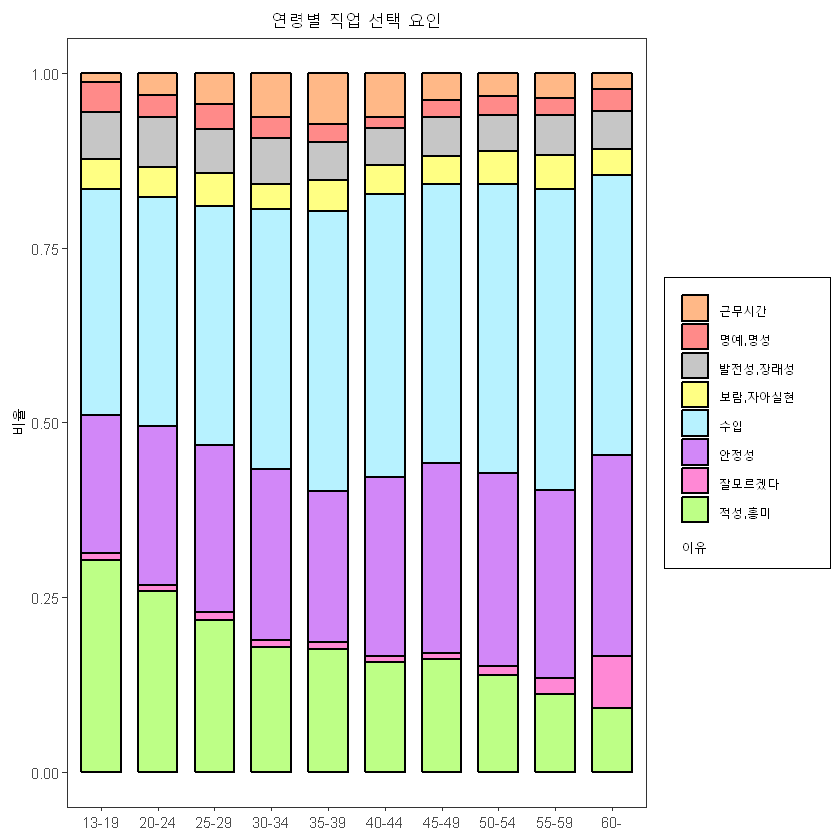

In [30]:
FDF<-ddply(Q3,c("factor","years2",'data'))
b1<-ggplot(FDF,aes(x=years2,y=data,fill=factor))+geom_bar(stat="identity",position="fill",width=0.7,color="black",size=0.7)+ggtitle("연령별 직업 선택 요인")+theme_test()+theme(plot.title=element_text(hjust=0.5),axis.title.x=element_blank(),legend.background=element_rect(color='black'),legend.margin=margin(10,10,10,10))+scale_fill_manual(values=c("#FFB887","#FF8A89","#C6C6C6","#FFFF83","#B7F2FF","#D287F8","#FF88D5","#BDFF86"))
b1+ylab("비율")+labs(fill='이유')+guides(fill=guide_legend(title.position="bottom"))
ggsave(file="C:/Users/santa/OneDrive/바탕 화면/시각화/Q3.jpg", width=20, height=15, units=c("cm"))